# Hierarchical cluster

In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

In [186]:
data=pd.read_csv('crime_data.csv',)

In [187]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [282]:
data=data.rename({'Unnamed: 0':'state'},axis=1)

In [283]:
data.head()

,states,murder,assault,urbanpop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [191]:
data.describe()

,murder,assault,urbanpop,rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


array([[<AxesSubplot:title={'center':'murder'}>,
        <AxesSubplot:title={'center':'assault'}>],
       [<AxesSubplot:title={'center':'urbanpop'}>,
        <AxesSubplot:title={'center':'rape'}>]], dtype=object)

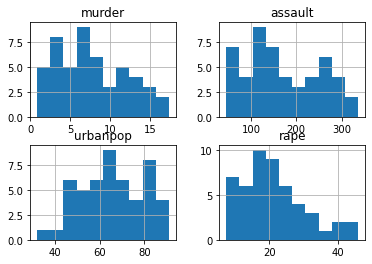

In [305]:
data.hist()

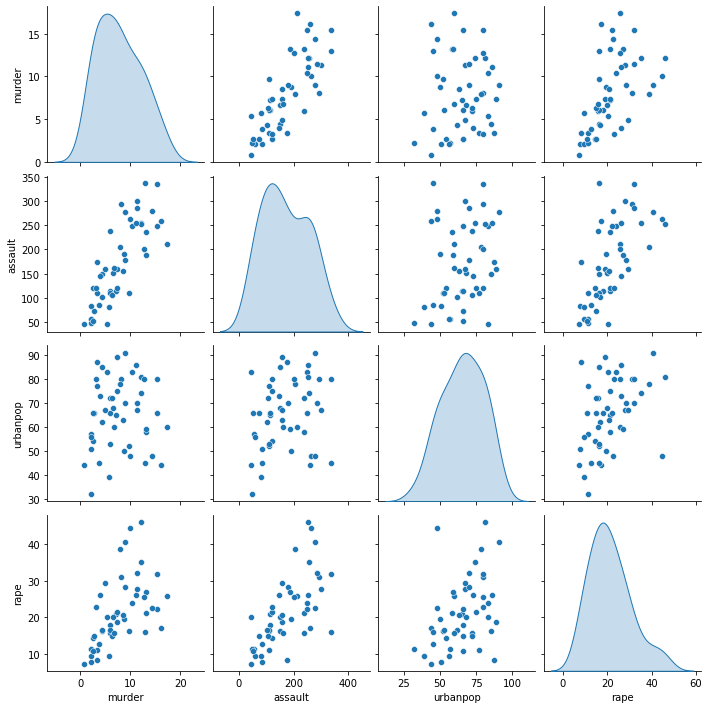

In [307]:
sns.pairplot(data,diag_kind="kde")

In [308]:
#Data Normalization
#Defining the normalization function
def normalf(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [309]:
#normalize the dataframe
crime_data_normal = normalf(data.iloc[:,1:])

In [310]:
crime_data_normal

,murder,assault,urbanpop,rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


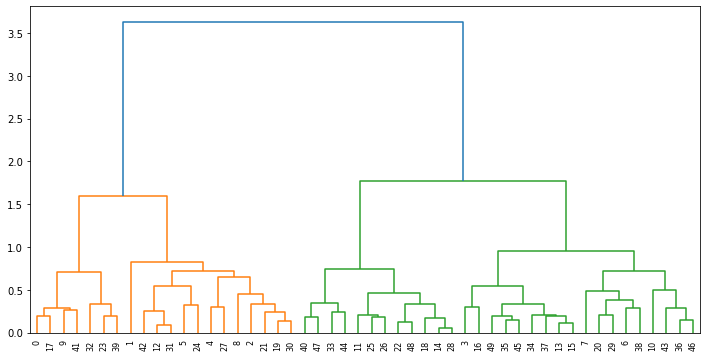

In [311]:
#certe a dendrogream
#Plotting the dendrogram - eard method
plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(crime_data_normal,method='ward'))

In [312]:
#Fit and Predict
#specifying hierarchical clustering, clusters as 3(we are concidering n of cluster =3)
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=3)

In [313]:
#prediction - there is no centroid in agglomerative options
y_hc = hc.fit_predict(crime_data_normal)
y_hc

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [315]:
#3 clusters are formed.
#creating new dataframe column as clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
data['Hierarchical_clusterid'] = Clusters

In [316]:
data

,states,murder,assault,urbanpop,rape,Hierarchical_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [317]:
data.groupby('Hierarchical_clusterid').agg(['mean']).reset_index()

,Hierarchical_clusterid,murder,assault,urbanpop,rape
,,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000
1,1,6.055556,140.055556,71.333333,18.683333
2,2,3.091667,76.000000,52.083333,11.833333


In [318]:
data['Hierarchical_clusterid'].value_counts()

0    20
1    18
2    12
Name: Hierarchical_clusterid, dtype: int64

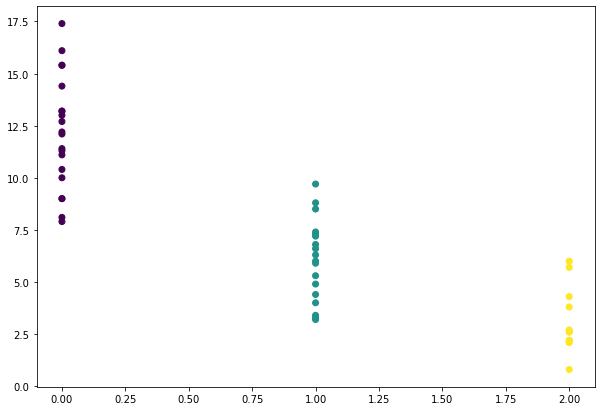

In [322]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data['Hierarchical_clusterid'],data['murder'], c=hc.labels_) 

# K-means 

In [196]:
k_data=pd.read_csv('crime_data.csv')

In [197]:
k_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [284]:
k_data=k_data.rename({'Unnamed: 0':'state'},axis=1)

In [285]:
k_data.head()

,states,murder,assault,urbanpop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [328]:
#Normalization function
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(k_data.iloc[:,1:])

In [329]:
scaled_crime_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

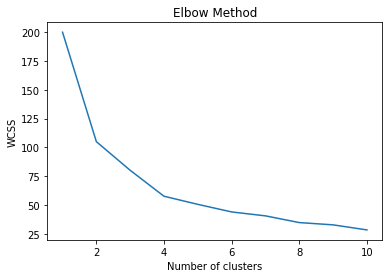

In [330]:
#Identify the best k-value using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_data)
    wcss.append(kmeans.inertia_) 
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.

In [331]:
#k = 4 is the best we can see
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=42) #randomly divide data into 4 partitions. Use any number but keep consistent
clusters_new

KMeans(n_clusters=4, random_state=42)

In [333]:
clusters_new.fit(scaled_crime_data)
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [336]:
data['ClusterID_new']=clusters_new.labels_
data.head()

,states,murder,assault,urbanpop,rape,Hierarchical_clusterid,ClusterID_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,1,1
4,California,9.0,276,91,40.6,0,2


In [337]:
#Average values of all data points within one cluster for profiling purposes.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [338]:
data.groupby('ClusterID_new').agg(['mean']).reset_index()

,ClusterID_new,murder,assault,urbanpop,rape,Hierarchical_clusterid
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,1.000000
1,1,13.937500,243.625000,53.750000,21.412500,0.125000
2,2,10.815385,257.384615,76.000000,33.192308,0.000000
3,3,3.600000,78.538462,52.076923,12.176923,1.923077


In [339]:
data['ClusterID_new'].value_counts()

0    16
2    13
3    13
1     8
Name: ClusterID_new, dtype: int64

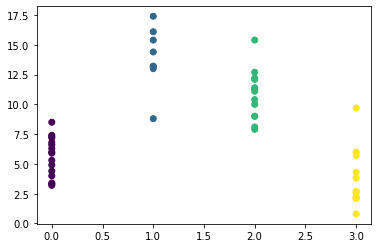

In [343]:
plt.scatter(data['ClusterID_new'],data['murder'],c = clusters_new.labels_)

Now we can comment that on different clusters.
The lowest amount of mean murder is in cluster 4

# DBSCAN

In [277]:
Data=pd.read_csv('crime_data.csv')

In [278]:
Data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [281]:
Data=Data.rename({'Unnamed: 0':'state'},axis=1)

In [243]:
Data

,states,murder,assault,urbanpop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [290]:
#drop state as it is not useful here
Data.drop(['state'],axis=1,inplace=True) 

In [291]:
#DBSCAN expects data in the form of an array/numpy representation
array=Data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
#stadardize the data
stdscaler = StandardScaler().fit(array)
x = stdscaler.transform(array)

In [295]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [296]:
#Min = D+1 where D is the number of columns.
#as we decrease eps, more outliers are formed as radius decreases.
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(x)

DBSCAN(eps=1.2)

In [249]:
from sklearn.cluster import DBSCAN

In [297]:
dbscan.labels_# -1 is noisy sample

array([ 0, -1, -1,  1, -1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [298]:
clust=pd.DataFrame(dbscan.labels_,columns=['cluster'])
clust.head()

,cluster
0,0
1,-1
2,-1
3,1
4,-1


In [299]:
Data1 = pd.concat([Data,clust],axis=1)
Data1.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,-1


In [300]:
Data1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.384615,274.076923,71.307692,31.615385
1,0,14.720000,232.600000,58.200000,23.720000
2,1,5.243750,119.125000,64.343750,16.625000


In [301]:
Data1.cluster.value_counts()

 1    32
-1    13
 0     5
Name: cluster, dtype: int64

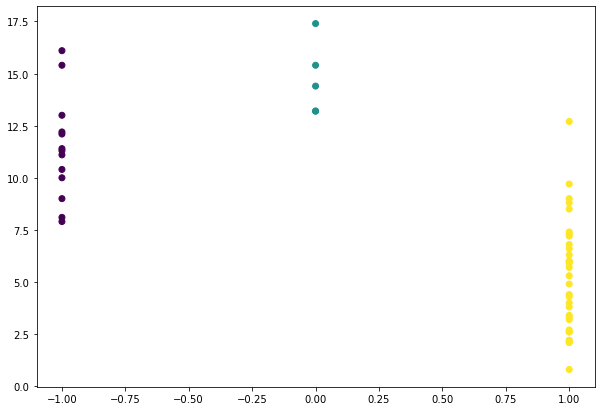

In [303]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(Data1['cluster'],Data1['Murder'], c=dbscan.labels_);

In [304]:
#Silhouette score
import sklearn
round(sklearn.metrics.silhouette_score(x, dbscan.labels_),5)

0.27882